### Exercise1

Given the xml file (log.xml), write a program using xpath to extract the information and output the result in the given format.

log.xml

``<logList>
  <list code="w001" message="Warning1"/>
  <list code="w002" message="Warning2"/>
  <list code="e001" message="Error1"/>
  <list code="e002" message="Error2"/>
  <day date="2007-12-01">
    <log time="10:00:00" code="w001"/>
    <log time="14:00:00" code="e001"/>
  </day>
  <day date="2007-12-02">
    <log time="13:00:00" code="e002"/>
    <log time="15:00:00" code="e001"/>
  </day>
</logList>``

Output Result:

date=2007-12-01 time=10:00:00 message=Warning1

date=2007-12-01 time=14:00:00 message=Error1

date=2007-12-02 time=13:00:00 message=Error2

date=2007-12-02 time=15:00:00 message=Error1

### Hint: 
- To get the element with attribute value equals to a variable, use ``string formatting`` to insert the field value into the XPath expression, e.g., xroot.find('.//log[@time="{0}"]'.format(time)).
- To get the parent element of current element, use ``xroot.find('.//log[@code="w001"]/..'`` (finds the parent element of log element with attribtue code equals to w001).

In [1]:
import xml.etree.ElementTree as et

#TODO for Exercise 1


date=2007-12-01 time=10:00:00 message=Warning1
date=2007-12-01 time=14:00:00 message=Error1
date=2007-12-02 time=13:00:00 message=Error2
date=2007-12-02 time=15:00:00 message=Error1


### Exercise 2

Revise your program in Exercise1 to store the result in a DataFrame and write to ``result.json``.

                                                           Output:

||date|time|message|
|----|----|----|
|0|2007-12-01|10:00:00|Warning1|
|1|2007-12-01|14:00:00|Error1|
|2|2007-12-02|13:00:00|Error2|
|3|2007-12-02|15:00:00|Error1|


In [2]:
import xml.etree.ElementTree as et
import pandas as pd
re_dict={}
date_list=[]
time_list=[]
message_list=[]
#TODO for Exercise 2


,date,time,message
0,2007-12-01,10:00:00,Warning1
1,2007-12-01,14:00:00,Error1
2,2007-12-02,13:00:00,Error2
3,2007-12-02,15:00:00,Error1


### Exercise 3

Revise your program in Exercise1 to output the result in the following xml format (the order of attributes are  ) and write to ``result.xml``.

result.xml

``<result>
  <log date="2007-12-01" message="Warning1" time="10:00:00" />
  <log date="2007-12-01" message="Error1" time="14:00:00" />
  <log date="2007-12-02" message="Error2" time="13:00:00" />
  <log date="2007-12-02" message="Error1" time="15:00:00" />
</result>``


In [3]:
import xml.etree.ElementTree as et
from xml.dom import minidom


result = et.Element('result')
#TODO for Exercise 3


'<?xml version="1.0" ?>\n<result>\n    <log date="2007-12-01" message="Warning1" time="10:00:00"/>\n    <log date="2007-12-01" message="Error1" time="14:00:00"/>\n    <log date="2007-12-02" message="Error2" time="13:00:00"/>\n    <log date="2007-12-02" message="Error1" time="15:00:00"/>\n</result>\n'

### Exercise4
Consider the Wikipedia page we used in Lecture notes ('https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes'). Write a program to extract the following information from that page:
- Try extracting all links from the first paragraph as well as where they point to (tip: look for the ``href`` attribute in ``<a>`` tags). Store the result in a DataFrame with two columns, i.e., Name and URL.
                                                        
 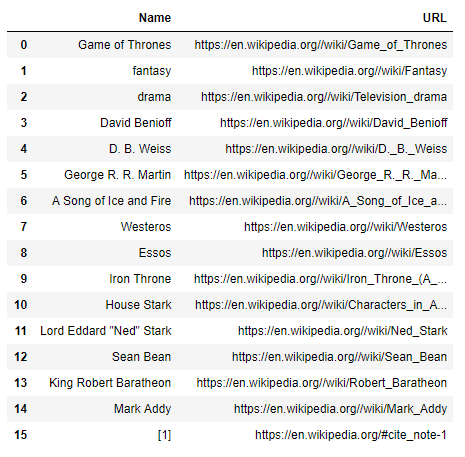

- Try extracting the "ratings" table from the page. 

**Hint**:
- Use ``html_soup.find('div', align="center").find('table', class_='wikitable')`` to find the ratings table as there is another table on the page with class attribute set to ``wikitable plainrowheaders.``, therefore directly use ``html_soup.find('table', class_='wikitable')`` with match that table.
- There are colspan and rowspan in the header in this table. When extracting ratings, you can focus on the 'rating body', i.e., start from the third row and third column. Among the ratings, there is a ``colspan`` for season 7, you can use the following code to extract number of columns it spans. 
``if(col.has_attr('colspan')): re = int(col.attrs['colspan'])``

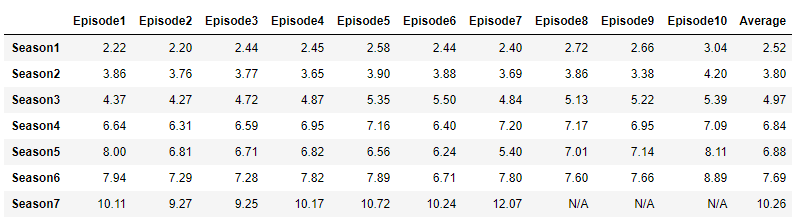

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes'
dict_url = {}
list_url =[]
list_description=[]
r = requests.get(url)
html_contents = r.text
#TODO for Exercise 4, extract urls


,Name,URL
0,Game of Thrones,https://en.wikipedia.org//wiki/Game_of_Thrones
1,fantasy,https://en.wikipedia.org//wiki/Fantasy
2,drama,https://en.wikipedia.org//wiki/Television_drama
3,David Benioff,https://en.wikipedia.org//wiki/David_Benioff
4,D. B. Weiss,https://en.wikipedia.org//wiki/D._B._Weiss
5,George R. R. Martin,https://en.wikipedia.org//wiki/George_R._R._Ma...
6,A Song of Ice and Fire,https://en.wikipedia.org//wiki/A_Song_of_Ice_a...
7,Westeros,https://en.wikipedia.org//wiki/Westeros
8,Essos,https://en.wikipedia.org//wiki/Essos
9,Iron Throne,https://en.wikipedia.org//wiki/Iron_Throne_(A_...


In [5]:
import pandas as pd
import requests
from collections import OrderedDict 

from bs4 import BeautifulSoup
url = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes'
season=[]
r = requests.get(url)
html_contents = r.text
#TODO for Exercise 4, extract ratings


,Episode1,Episode2,Episode3,Episode4,Episode5,Episode6,Episode7,Episode8,Episode9,Episode10,Average
Season1,2.22,2.20,2.44,2.45,2.58,2.44,2.40,2.72,2.66,3.04,2.52
Season2,3.86,3.76,3.77,3.65,3.90,3.88,3.69,3.86,3.38,4.20,3.80
Season3,4.37,4.27,4.72,4.87,5.35,5.50,4.84,5.13,5.22,5.39,4.97
Season4,6.64,6.31,6.59,6.95,7.16,6.40,7.20,7.17,6.95,7.09,6.84
Season5,8.00,6.81,6.71,6.82,6.56,6.24,5.40,7.01,7.14,8.11,6.88
Season6,7.94,7.29,7.28,7.82,7.89,6.71,7.80,7.60,7.66,8.89,7.69
Season7,10.11,9.27,9.25,10.17,10.72,10.24,12.07,N/A,N/A,N/A,10.26
